In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/binary/data.csv', header=None)
Label = (data[0].values+1)/2
X = data[[1,2]].values

(100, 2)


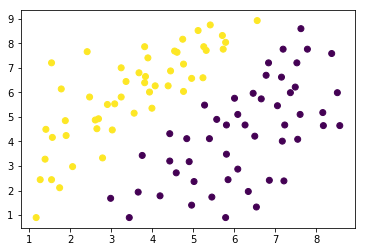

In [3]:
print(X.shape)
plt.scatter(X[:,0],X[:,1], c=Label)
plt.show()

In [7]:
learning_rate = 0.01
training_epochs = 25
batch_size = 10
display_step = 1

tf.reset_default_graph()

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2], name ='input') # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 1], name = 'output') # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Construct model
sig = tf.sigmoid(tf.matmul(x, W)) + b
pred = tf.greater(sig, 0.5) # Softmax
correct = tf.equal(pred, tf.equal(y,1.0))
accuracy = tf.reduce_mean( tf.cast(correct, 'float') )
    
# Minimize error using cross entropy
cost = tf.reduce_mean(tf.reduce_sum(tf.pow(sig-y,2), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [8]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x: X, y: Label})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: X, y:Label})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={x: X, y: Label})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.scatter(X[:,0],X[:,1], c=Label)
    plt.plot(X[:,0], sess.run(W) * X[:,0] + sess.run(b) , label='Fitted line')
    plt.legend()
    plt.show()

ValueError: Cannot feed value of shape (100,) for Tensor 'output:0', which has shape '(?, 1)'